In [1]:
from   astropy.io import fits
from astropy.table import Table
import numpy as np
import os
import optparse
import warnings
warnings.filterwarnings('ignore')
from matplotlib.tri import Triangulation, TriAnalyzer
import code
import scipy
import scipy.ndimage

import glob
from os import path

import matplotlib
import matplotlib.pyplot       as     plt
from   mpl_toolkits.axes_grid1 import AxesGrid
from   matplotlib.ticker       import MultipleLocator, FuncFormatter
from matplotlib import cm

from plotbin.sauron_colormap import register_sauron_colormap
register_sauron_colormap()

print("****")

****


In [2]:
indir = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\EAGLE SIMULATIONS\\NEW_FILES\\'
figdir = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\EAGLE SIMULATIONS\\IMAGES\\'


In [10]:
file1 = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\SimSpin_EAGLE_observations_snap28_RefL0100N1504.txt'
tst = Table.read(file1, format  = 'ascii')

In [11]:
tst

GalaxyID,GroupNumber,SubGroupNumber,StellarMass_subfind,StellarMass_50kpc,StellarMass_ss_i90,StellarMass_ss_i60,r50_halfmass,r50_halfmass_proj,r50_lum,NumberOfParticles_subfind,NumberOfParticles_50kpc,NumberOfParticles_ss_i90,NumberOfParticles_ss_i60,PixelSize,LambdaR_i90,LambdaR_i60,LambdaR_lagos,Ellip_i90,Ellip_i60
int32,int32,int32,str12,str12,float64,str16,float64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64
13935854,1,6,84959511000,79915950000,48303487381.75,44164459202,7.017046,5.2929597,5.84049,58988,59073,33644,30498,1.47326110894402,0.566069256565209,0.522755199839302,0.725344,0.814474415933448,0.500940126447324
13945981,1,8,73415156000,63611249000,37294174204.5,37751425798.5,8.067293,6.1731033,8.83797,55041,55607,31210,31631,1.71885888225306,0.325620140512009,0.262179605376089,0.201945,0.590032354630757,0.334394810890819
8058402,1,9,69201748000,64705946000,36416123867.5,35591561361.75,8.496039,6.227539,9.37677,52158,52174,27688,27004,1.73264828152661,0.0983718573258317,0.0854015665150268,0.0945193,0.467637030486606,0.259217584938622
8071905,1,13,102878282000,96114835000,56071598677.75,53432132237,7.884777,5.971071,8.84586,75732,76308,42366,40271,1.65896632293316,0.255254121061631,0.234451874415563,0.363349,0.575462829681449,0.429726137106007
8083281,1,16,58621927000,57773756000,34123515095.5,30004309708.125,7.9417133,5.7089643,7.09093,42515,42517,23946,20844,1.58957890361521,0.56761600597466,0.515320601134932,0.714833,0.659117615276358,0.372964054807628
8088440,1,19,33280972800,32904851500,19040745285.75,17097127830.6875,6.57154,4.871291,7.47428,24411,24417,13624,12194,1.35609708314391,0.528461459811834,0.498754555222886,0.737242,0.792546928826637,0.524261374464961
8097696,1,23,49867510000,49549922000,29423051891.5625,25628156811.5,6.0401106,4.421983,5.21633,36328,36530,20269,17379,1.2286012346562,0.58886188192254,0.527655032073493,0.670153,0.684174451449402,0.448992864819189
8099173,1,24,53823058000,53274718000,30900653991.5625,26935907548.75,6.8554378,4.9852533,6.80789,39597,39630,22217,19348,1.38429400534143,0.514637696125272,0.458479238371205,0.631197,0.740102003738964,0.43678543497334
8111397,1,28,29393317900,29182994400,17012376632.8125,15109753951.8125,5.5762534,4.2120214,5.52138,22188,22192,12466,10993,1.17161454822306,0.429855653138825,0.37190800089033,0.636824,0.688458636421005,0.365555350415289


In [14]:
lam = tst.field('LambdaR_lagos')
id1 = tst.field('GalaxyID')
ids = tst['GalaxyID']
lambda60 = tst['LambdaR_i60']
ellip60 = tst['Ellip_i60']
ids = np.array(ids)
lambda60 = np.array(lambda60)
ellip60 = np.array(ellip60)

In [15]:
np.max(lam)

0.872337

In [22]:
np.shape(ids)

(903,)

In [23]:
ids[0]

13935854

In [17]:
lambdar = np.array(lam)

In [21]:
aa = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\lagosids.npy', ids)

In [16]:
# tst[307]

In [3]:
files = glob.glob(indir + '*.FITS')
new_files = []
for file in files:
    if 'fwhm00' in file:
        new_files.append(file)


In [4]:
np.size(new_files)

3164

In [22]:
np.size(files)

3164

In [20]:
# X_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_lambda', lambda60)
# X1_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ellip', ellip60)
# X2_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ID2', ids)

In [5]:
# path2 = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\'
# rrr = tst.write('eagle_test.fits', format = 'fits')

In [26]:
def read_eagle(file): #read the stellar population results
    #read age data
    table_hdu = fits.open(file)
    
    stelkin      = np.empty((np.shape(table_hdu[2].data)))
    stelkin[0,:,:] = table_hdu[4].data[1,:,:]
    stelkin[1,:,:] = table_hdu[4].data[2,:,:]
    stelkin[2,:,:] = table_hdu[4].data[0,:,:]
    stelkin[3,:,:] = table_hdu[4].data[3,:,:]
    
    return stelkin
    

In [9]:
a = fits.open(new_files[15])
a[5].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                   30 / length of data axis 1                          
NAXIS2  =                   30 / length of data axis 2                          
NAXIS3  =                    4 / length of data axis 3                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'INC_90  '           / This extension contains data values            
HDUCLASS= 'ESO     '           / class name (ESO format)                        
HDUDOC  = 'DICD    '           / document with class description                
HDUVERS = 'DCID version 6'     / version number (according to spec v2.5.1)      
PSF     =                   

In [7]:
# files = glob.glob(indir + '*.FITS')
# print(files[0])

# fig = plt.figure()

# columns = 9
# rows = 9
# fi = 0
# pixelsize = 0.5
    
# fig, ax_array = plt.subplots(rows, columns,squeeze=False,figsize=(20,20))
# for i,ax_row in enumerate(ax_array):
#     for j,axes in enumerate(ax_row):
#         #axes.set_title('{},{}'.format(i,j))
#         #axes.set_yticklabels([])
#         #axes.set_xticklabels([])
 
#         if fi%3 == 0:
#             file = files[fi]
#             stelkin = read_eagle(file)

#             axes.tick_params(direction='in')

#             # Create image in pixels
#             val = np.squeeze(stelkin[2,:,:])
#         if fi%3 == 1:
#             val = np.squeeze(stelkin[0,:,:])
#         if fi%3 == 2:
#             val = np.squeeze(stelkin[1,:,:])

#         vmin = np.nanmin(val)        
#         vmax = np.nanmax(val)
#         # Create image in pixels
#         xmin = (len(val[0,:])-len(val[0,:])/2) * pixelsize * -1
#         xmax = ((len(val[0,:])/2) * pixelsize)
#         ymin = (len(val[:,0])-len(val[:,0])/2) * pixelsize * -1
#         ymax = ((len(val[:,0])/2) * pixelsize)
#         image = val

#         cmap_array = ['inferno','RdYlBu_r','YlOrRd']
#         tmp = axes.imshow(image, cmap=cmap_array[fi%3], interpolation=None, vmin=vmin, vmax=vmax, \
#                 extent=[xmin-pixelsize/2, xmax+pixelsize/2, ymin-pixelsize/2, ymax+pixelsize/2] )
        
#         fi += 1
        
# plt.savefig(figdir+'jvds_eagle_sim_maps.pdf', bbox_inches='tight', pad_inches=0.3)
        
# plt.show()

In [36]:
files = glob.glob(indir + '*.FITS')
stelkin = read_eagle(files[0])
sig = stelkin[1,:,:]

In [13]:
# hdu = fits.open(files[0])
# GID = hdu[1].data[0][0]
# m_sol = hdu[1].data[0][1]
# m_sol50 = hdu[1].data[0][2]
# r50_star = hdu[1].data[0][3]
# r50_star_proj = hdu[1].data[0][4]
# re_r  = hdu[1].data[0][5]
# z = hdu[1].data[0][6]

In [39]:
eagle_GID = []
eagle_m_sol = []
eagle_m_sol50  = []
eagle_r50 = []
eagle_r50_proj = []
eagle_z = []
eagle_re_r = []
eagle_ang = []
eagle_radhi = []
stuff = np.zeros((np.size(new_files), 4))


for i in range(0, np.size(new_files)):
    hdu = fits.open(new_files[i])
    GID = int(hdu[1].data[0][0])
    m_sol = hdu[1].data[0][1]
    log_m_sol = np.log10(m_sol)
    m_sol50 = hdu[1].data[0][2]
    log_m_sol50 = np.log10(m_sol50)
    
    r50_star = hdu[1].data[0][3]
    r50_star_proj = hdu[1].data[0][4]
    re_r  = hdu[1].data[0][5]
    z = hdu[1].data[0][6]
    ang = hdu[1].data[0][7]
       
    try:
        radhi = hdu[5].header['RADHI']  
    except:
         radhi = np.NaN
            
    try:
        ellip90 = hdu[5].header['ELLIP']
        lambdar90 = hdu[5].header['LAMBDAR']
        ellip60 = hdu[4].header['ELLIP']
        lambdar60 = hdu[4].header['LAMBDAR']
    
        stuff[i, 0] = ellip90
        stuff[i, 1] = lambdar90
        stuff[i, 2] = ellip60
        stuff[i, 3] = lambdar60
    
    except:
        stuff[i, 0] = np.NaN
        stuff[i, 1] = np.NaN
        stuff[i, 2] = np.NaN
        stuff[i, 3] = np.NaN
    
    eagle_GID.append(GID)
    eagle_m_sol.append(log_m_sol)
    eagle_m_sol50.append(log_m_sol50)
    eagle_r50.append(r50_star)
    eagle_r50_proj.append(r50_star_proj)
    eagle_re_r.append(re_r)
    eagle_z.append(z)
    eagle_ang.append(ang)
    eagle_radhi.append(radhi)
    
eagle_GID = np.array(eagle_GID)
eagle_m_sol = np.array(eagle_m_sol)
eagle_m_sol50  = np.array(eagle_m_sol50)
eagle_r50 = np.array(eagle_r50)
eagle_r50_proj = np.array(eagle_r50_proj)
eagle_re_r = np.array(eagle_re_r)
eagle_z = np.array(eagle_z)
eagle_ang = np.array(eagle_ang)
eagle_radhi = np.array(eagle_radhi)

In [40]:
np.shape(eagle_radhi)

(3164,)

In [43]:
eagle_radhi[1275]

5.59498970510652

In [44]:
np.shape(eagle_GID)

(3164,)

In [41]:
lambdar90 = stuff[:, 1]
ellip90 = stuff[:, 0]
lambdar60 = stuff[:, 3]
ellip60 = stuff[:, 2]

In [42]:
np.where(eagle_GID == 16555698)

(array([1275], dtype=int64),)

In [44]:
array = []
for i in eagle_ID2:
#     print(i)
    array.append(i)

In [46]:
X_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ID_0510', eagle_GID)
X_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_M_SOL_0510', eagle_m_sol)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_M_SOL50_0510', eagle_m_sol50)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_R50_0510', eagle_r50)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_R50_PROJ_0510', eagle_r50_proj)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_RE_R_0510', eagle_re_r)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_Z_0510', eagle_z)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ANG_0510', eagle_ang)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_radhi_0510', eagle_radhi)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_lambdar60_0510', lambdar60)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_lambdar90_0510', lambdar60)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ellip60_0510', ellip60)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ellip90_0510', ellip90)

In [48]:
np.size(files)

3164

In [51]:
# files = glob.glob(indir + '*.FITS')
files = new_files
# tests = []
num_goods = []
training_data_eagle = []
maxmin = []
ratios = []
sigs = []
for i in range(0, np.size(files)):
#     print(i)
    table = fits.open(files[i])
    
    galaxyIDfull = table[2].header['OBJECT']
    
    GID = galaxyIDfull[14:]
#     print(GID)
    
    stelkin = read_eagle(files[i])
    vel = stelkin[0,:,:]
    sig = stelkin[1,:,:]
    pix = stelkin[3,:,:]

    vel_3sigmax = np.nanmean(vel) + 3*np.nanstd(vel)
    vel_3sigmin = np.nanmean(vel) - 3*np.nanstd(vel)
    sig_3sigmax = np.nanmean(sig) + 3*np.nanstd(sig)
    
    vel = np.where((pix > 25) & (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax), vel, np.NaN)  
    sig = np.where((pix > 25) & (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax), sig, np.NaN)  
    
    max_vel = np.nanmax(vel)
    min_vel = np.nanmin(vel)
    max_sig = np.nanmax(sig)
    min_sig = np.nanmin(sig)
    
    maxmin.append([min_vel, max_vel, min_sig, max_sig])
    
    num_good = np.sum(np.where(pix > 25, 1, 0))
    num_goods.append(num_good)
        
#     test = np.where((pix > 25) & (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax), 1, np.NaN)
#     test = np.where((pix > 50) & (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax), 2, test)
#     test = np.where((pix > 75) & (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax), 3, test)
#     test = np.where((pix > 100) & (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax), 4, test)
    
#     tests.append(test)
        
#     vel = np.where((pix > 25), vel, np.NaN)
#     sig = np.where(pix > 25, sig, np.NaN)
    
    emp = np.empty((30,10))
    emp[:] = np.NaN
    
    emp2 = np.empty((10,50))
    emp2[:] = np.NaN
    
    vel = np.concatenate((emp, vel, emp), axis = 1)
    sig = np.concatenate((emp, sig, emp), axis = 1)

    vel = np.concatenate((emp2, vel, emp2), axis = 0)
    sig = np.concatenate((emp2, sig, emp2), axis = 0)
    
    
    sig_use = np.nanpercentile(sig, 95) 
    sigs.append(sig_use)

#     vel = np.where(vel > sig_use, sig_use, vel)
    
    vel99 = np.nanmax(vel)
    ratio = vel99/sig_use
    
    if ratio > 1:
        ratio = 1
    if ratio < 0:
        ratio = 0
        
    ratios.append(ratio)
    
    vel = (vel - np.nanmin(vel))/(np.nanmax(vel) - np.nanmin(vel))
    vel = np.nan_to_num(vel, nan = 0.5)
    
    vel_scaled = (2*vel)-1 
    
    vel_scaled = vel_scaled*ratio
    
    vel_scaled = (vel_scaled+1)/2
    
    sig = (sig - np.nanmin(sig))/(np.nanmax(sig) - np.nanmin(sig))
    sig = np.nan_to_num(sig, nan = 0)
#     sig = sig*sigratio
   
    training_data_eagle.append([vel, sig, GID, vel_scaled])

(array([ 49., 215., 379., 415., 386., 338., 296., 253., 237., 596.]),
 array([0.14567226, 0.23110503, 0.31653781, 0.40197058, 0.48740335,
        0.57283613, 0.6582689 , 0.74370168, 0.82913445, 0.91456723,
        1.        ]),
 <BarContainer object of 10 artists>)

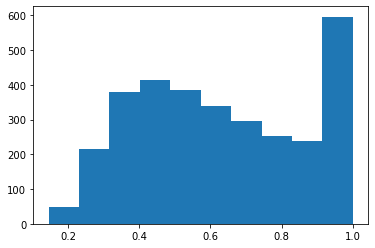

In [53]:
plt.hist(ratios)

In [52]:
np.shape(training_data_eagle)

(3164, 4)

(array([  9.,  46., 132., 352., 352., 229., 152.,  94.,  53.,  16.]),
 array([-0.34098317, -0.1694343 ,  0.00211457,  0.17366344,  0.34521231,
         0.51676117,  0.68831004,  0.85985891,  1.03140778,  1.20295665,
         1.37450551]),
 <BarContainer object of 10 artists>)

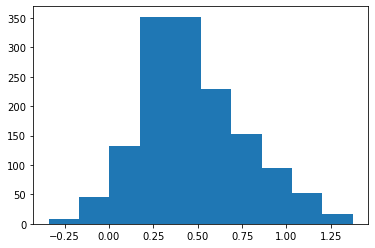

In [12]:
plt.hist(ratios)

In [65]:
maxmin1 = np.array(maxmin)
vmin = maxmin1[:,0]
vmax = maxmin1[:,1]
smin = maxmin1[:,2]
smax = maxmin1[:,3]

In [66]:
X_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_vmin_051021', vmin)
X_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_vmax_051021', vmax)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_smin_051021', smin)
Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_smax_051021', smax)

# Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ellip60_140921', ellip)
# Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_lambdar60_140921', lambdar)


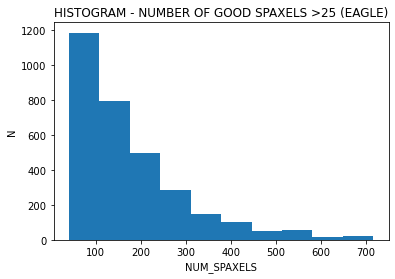

In [87]:
plt.hist(num_goods)
plt.title('HISTOGRAM - NUMBER OF GOOD SPAXELS >25 (EAGLE)')
plt.ylabel('N')
plt.xlabel('NUM_SPAXELS')
plt.show()

In [18]:
median = np.nanmedian(ab)
ab = np.nan_to_num(ab, median)

In [73]:
ind = np.argpartition(num_goods, -5)[-5:]

In [74]:
ind

array([1076,  966, 1070, 1236, 1158], dtype=int64)

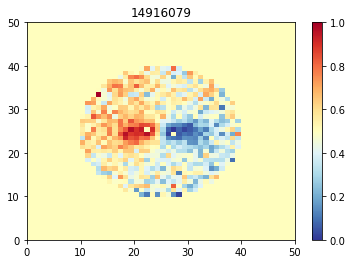

In [78]:
n = 1070
a = training_data_eagle[n][0]
b = training_data_eagle[n][1]
c = training_data_eagle[n][2]
d = training_data_eagle[n][3]

plt.pcolor(a, cmap = 'RdYlBu_r', vmin = 0, vmax = 1)
plt.title(c)
plt.colorbar()
plt.show()

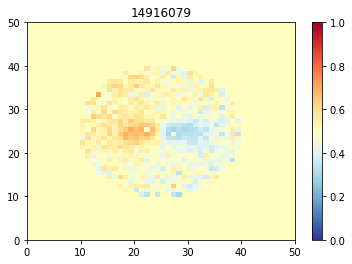

In [79]:
plt.pcolor(d, cmap = 'RdYlBu_r', vmin = 0, vmax = 1)
plt.title(c)
plt.colorbar()

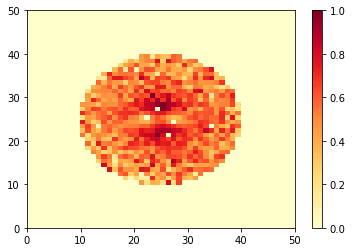

In [80]:
plt.pcolor(b, cmap = 'YlOrRd')
plt.colorbar()

In [81]:
X = []
X1 = []
Z = []
Z2 = []

for velmaps, sigmaps, catids, scvels in training_data_eagle:
    X.append(velmaps)
    X1.append(sigmaps)
    Z.append(catids)
    Z2.append(scvels)

X = np.array(X).reshape(-1, 50,50, 1)
X1 = np.array(X1).reshape(-1, 50,50, 1)
Z = np.array(Z)
Z2 = np.array(Z2).reshape(-1, 50,50, 1)

In [82]:
Z[0:5]

array(['10001175', '10003929', '10005161', '10006223', '10007496'],
      dtype='<U8')

In [85]:
np.shape(Z2)

(3164, 50, 50, 1)

In [88]:
type(num_goods)

list

In [92]:
np.shape(num_goods)

(3164,)

In [89]:
num_goods = np.array(num_goods)

In [86]:
X_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_vel_0510', X)
X1_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_sig_0510', X1)

Z_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_ID_0510', Z)
Z2_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_vel_sigscale_0510', Z2)


In [91]:
Z2_vals_classified = np.save('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\TRAINING_DATA\\EAGLE_numsp_0510', num_goods)
